In [47]:
import os
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Directorios de datos
train_dir = '/Users/aneco/Documents/Instituto Tecnologico De Morelia/8vo Semestre/Inteligencia Artificial/Git Proyects/Proyectos Finales/Flores/entrenamiento'
test_dir = '/Users/aneco/Documents/Instituto Tecnologico De Morelia/8vo Semestre/Inteligencia Artificial/Git Proyects/Proyectos Finales/Flores/pruebas'

images = []
labels = []

# Tamaño al que se redimensionarán las imágenes
target_size = (150, 150)

# Recorrer las carpetas de entrenamiento
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)

    if os.path.isdir(class_path):
        print(f"Leyendo imágenes de la carpeta de entrenamiento {class_folder}")

        for filename in os.listdir(class_path):
            if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
                filepath = os.path.join(class_path, filename)

                # Redimensionar y cargar la imagen
                image = load_img(filepath, target_size=target_size)
                image_array = img_to_array(image)

                images.append(image_array)
                labels.append(class_folder)

# Convertir a numpy array
images = np.array(images)
labels = np.array(labels)

# Convertir etiquetas a valores numéricos
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Dividir datos de entrenamiento en conjuntos de entrenamiento y validación
train_X, val_X, train_Y, val_Y = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Normalizar datos de imagen
train_X = train_X.astype('float32') / 255.0
val_X = val_X.astype('float32') / 255.0

# Convertir etiquetas a one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
val_Y_one_hot = to_categorical(val_Y)

# Construir el modelo
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(labels)), activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(train_X)

# Parada anticipada
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(datagen.flow(train_X, train_Y_one_hot, batch_size=64), 
                    epochs=18, 
                    validation_data=(val_X, val_Y_one_hot), 
                    callbacks=[early_stop])
# Guardar el modelo
model.save("modelo.keras")

# Cargar datos de prueba
test_images = []
test_labels = []

# Recorrer las carpetas de prueba
for class_folder in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_folder)

    if os.path.isdir(class_path):
        print(f"Leyendo imágenes de la carpeta de prueba {class_folder}")

        for filename in os.listdir(class_path):
            if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
                filepath = os.path.join(class_path, filename)

                # Redimensionar y cargar la imagen
                image = load_img(filepath, target_size=target_size)
                image_array = img_to_array(image)

                test_images.append(image_array)
                test_labels.append(class_folder)

# Convertir a numpy array
test_X = np.array(test_images)
test_Y = np.array(test_labels)

# Convertir etiquetas a valores numéricos
test_Y_one_hot = to_categorical(label_encoder.transform(test_Y))

# Normalizar datos de imagen
test_X = test_X.astype('float32') / 255.0

# Evaluar el modelo en datos de prueba
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)

# Imprimir métricas
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

# Obtener métricas adicionales
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# Plot de la precisión
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Plot de la pérdida
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Leyendo imágenes de la carpeta de entrenamiento girasoles
Leyendo imágenes de la carpeta de entrenamiento manzanilla
Leyendo imágenes de la carpeta de entrenamiento rosas
Leyendo imágenes de la carpeta de entrenamiento diente_de_leon
Leyendo imágenes de la carpeta de entrenamiento tulipanes


Epoch 1/18
12/46 [======>.......................] - ETA: 6s - loss: 2.3182 - accuracy: 0.2331

KeyboardInterrupt: 

1/1 [==============================] - 0s 39ms/step
Archivo: /Users/aneco/Documents/Instituto Tecnologico De Morelia/8vo Semestre/Inteligencia Artificial/Git Proyects/Proyectos Finales/Flores/imagenes de prueba/girasoles/Cultivo-del-girasol.png
Especie predicha: girasoles
Probabilidades: [9.2229888e-02 8.5134417e-01 2.9754938e-05 5.7880906e-04 5.5817496e-02]




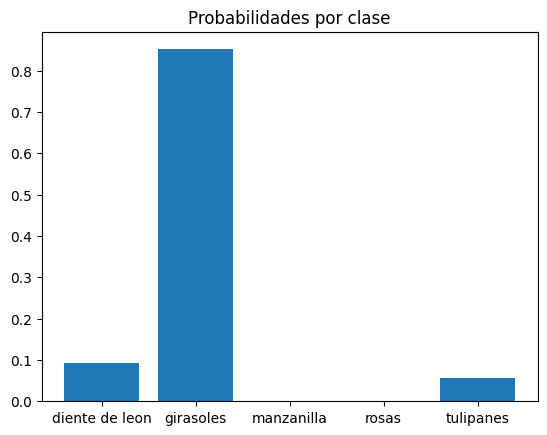

1/1 [==============================] - 0s 16ms/step
Archivo: /Users/aneco/Documents/Instituto Tecnologico De Morelia/8vo Semestre/Inteligencia Artificial/Git Proyects/Proyectos Finales/Flores/imagenes de prueba/girasoles/Heliotropismo-por-que-los-girasoles-miran-al-sol-portada.png
Especie predicha: girasoles
Probabilidades: [3.2308910e-02 9.6683705e-01 1.6536709e-06 1.2327617e-05 8.4013952e-04]




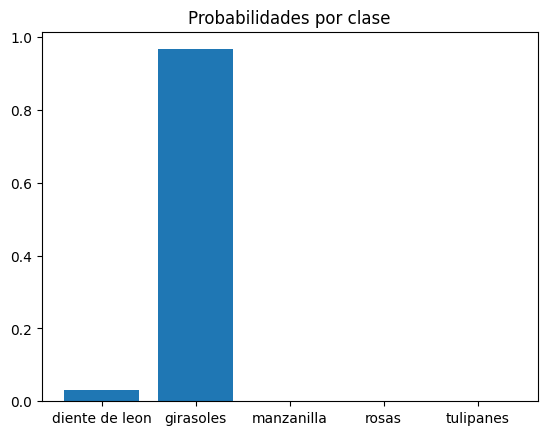

1/1 [==============================] - 0s 13ms/step
Archivo: /Users/aneco/Documents/Instituto Tecnologico De Morelia/8vo Semestre/Inteligencia Artificial/Git Proyects/Proyectos Finales/Flores/imagenes de prueba/manzanilla/planta_de_manzanilla_cuidados_y_para_que_sirve_2203_600.jpg
Especie predicha: girasoles
Probabilidades: [0.03518228 0.5446279  0.3442683  0.01801493 0.05790664]




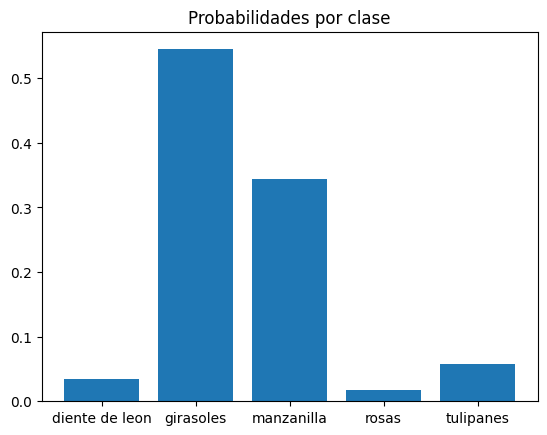

1/1 [==============================] - 0s 11ms/step
Archivo: /Users/aneco/Documents/Instituto Tecnologico De Morelia/8vo Semestre/Inteligencia Artificial/Git Proyects/Proyectos Finales/Flores/imagenes de prueba/manzanilla/manzanilla.jpg
Especie predicha: manzanilla
Probabilidades: [0.02508809 0.05553824 0.8984985  0.00923395 0.01164126]




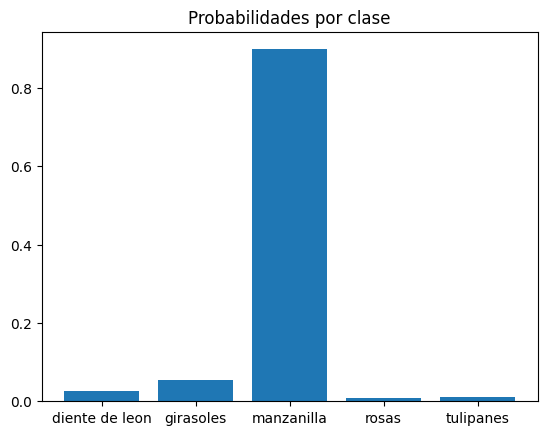

1/1 [==============================] - 0s 13ms/step
Archivo: /Users/aneco/Documents/Instituto Tecnologico De Morelia/8vo Semestre/Inteligencia Artificial/Git Proyects/Proyectos Finales/Flores/imagenes de prueba/rosas/shutterstock_508983877-1280x720.jpg
Especie predicha: rosas
Probabilidades: [6.8083056e-05 1.9702655e-05 6.9460482e-04 7.7898252e-01 2.2023514e-01]




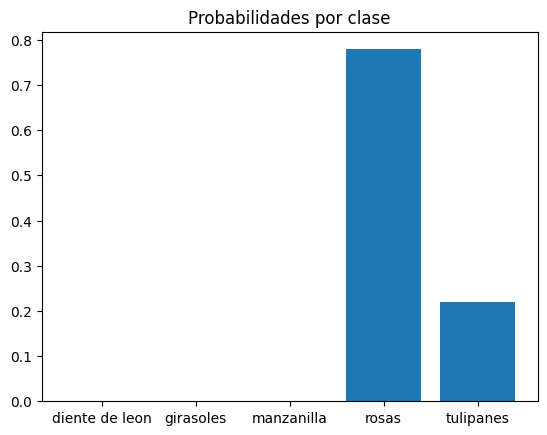

1/1 [==============================] - 0s 14ms/step
Archivo: /Users/aneco/Documents/Instituto Tecnologico De Morelia/8vo Semestre/Inteligencia Artificial/Git Proyects/Proyectos Finales/Flores/imagenes de prueba/rosas/250px-Rosa_'Ambiente',_Bad_Wörishofen,_Alemania,_2019-06-20,_DD_25.jpg
Especie predicha: diente de leon
Probabilidades: [7.4729341e-01 5.6734955e-04 1.0208833e-01 1.0932530e-01 4.0725533e-02]




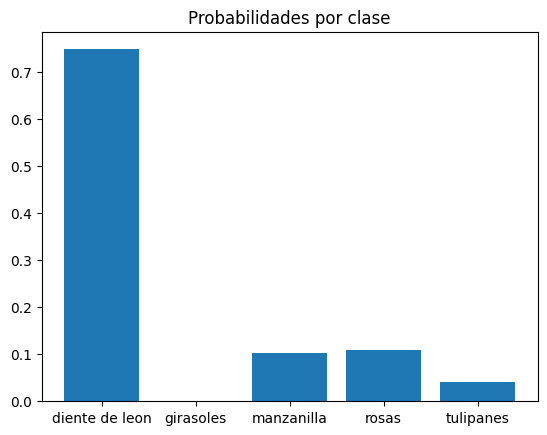

1/1 [==============================] - 0s 12ms/step
Archivo: /Users/aneco/Documents/Instituto Tecnologico De Morelia/8vo Semestre/Inteligencia Artificial/Git Proyects/Proyectos Finales/Flores/imagenes de prueba/diente_de_leon/th-diente-leon-02-1180x520.jpg
Especie predicha: diente de leon
Probabilidades: [0.78997695 0.00378763 0.15478833 0.02841724 0.02302985]




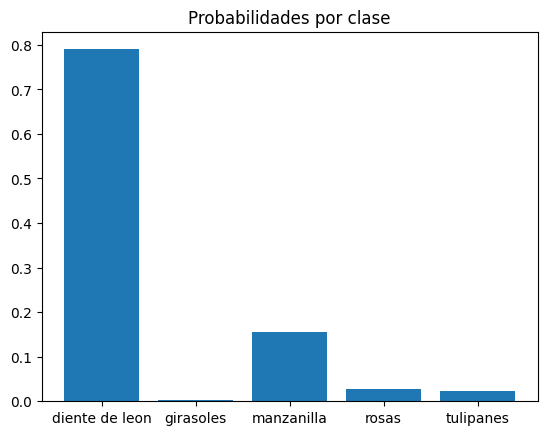

1/1 [==============================] - 0s 16ms/step
Archivo: /Users/aneco/Documents/Instituto Tecnologico De Morelia/8vo Semestre/Inteligencia Artificial/Git Proyects/Proyectos Finales/Flores/imagenes de prueba/diente_de_leon/diente-de-leon.jpg
Especie predicha: diente de leon
Probabilidades: [0.83443904 0.00183618 0.03535462 0.08359211 0.04477811]




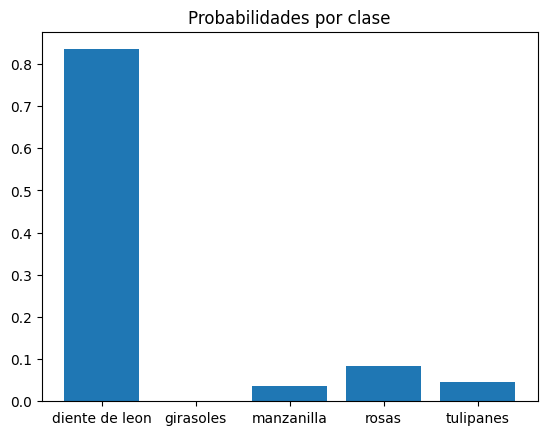

1/1 [==============================] - 0s 14ms/step
Archivo: /Users/aneco/Documents/Instituto Tecnologico De Morelia/8vo Semestre/Inteligencia Artificial/Git Proyects/Proyectos Finales/Flores/imagenes de prueba/tulipanes/tulipanes.jpg
Especie predicha: tulipanes
Probabilidades: [2.2423821e-05 6.7555273e-05 2.2262997e-04 3.4682655e-01 6.5286088e-01]




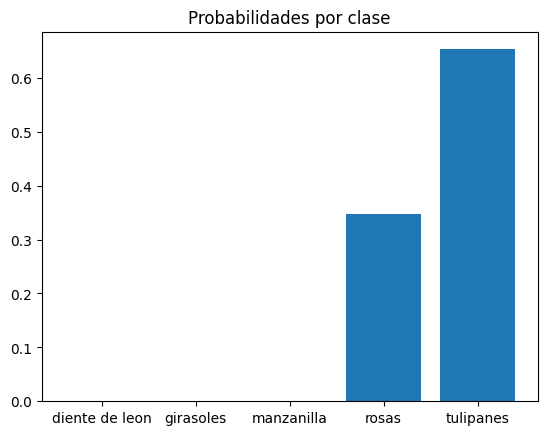

1/1 [==============================] - 0s 12ms/step
Archivo: /Users/aneco/Documents/Instituto Tecnologico De Morelia/8vo Semestre/Inteligencia Artificial/Git Proyects/Proyectos Finales/Flores/imagenes de prueba/tulipanes/tulipan.jfif.jpeg
Especie predicha: tulipanes
Probabilidades: [2.9510789e-05 1.5213427e-03 2.3239102e-04 1.0743759e-01 8.9077914e-01]




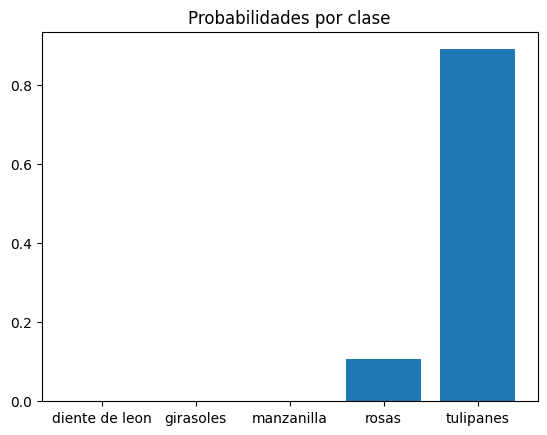

In [48]:
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Directorio donde se encuentra el modelo original
modelo_original_ruta = '/Users/aneco/Documents/Instituto Tecnologico De Morelia/8vo Semestre/Inteligencia Artificial/Git Proyects/Proyectos Finales/Flores/modelo.keras'

# Cargar el modelo original
modelo_original = load_model(modelo_original_ruta)

# Directorio donde se encuentran las nuevas imágenes de prueba
directorio_base = '/Users/aneco/Documents/Instituto Tecnologico De Morelia/8vo Semestre/Inteligencia Artificial/Git Proyects/Proyectos Finales/Flores/imagenes de prueba'

# Diccionario de mapeo de clases a índices
mapeo_clases_a_indices = {'diente de leon': 0, 'girasoles': 1, 'manzanilla': 2, 'rosas': 3, 'tulipanes': 4}

# Invertir el diccionario para obtener un mapeo de índices a nombres de clases
mapeo_indices_a_clases = {v: k for k, v in mapeo_clases_a_indices.items()}

# Recorrer todas las subcarpetas y archivos en el directorio base
for subdir, _, files in os.walk(directorio_base):
    for image_file in files:
        # Verificar si el archivo es una imagen válido
        if not image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            if not image_file.startswith('.'):
                print(f"El archivo no es una imagen válido: {image_file}")
            continue  # Continuar con la siguiente iteración del bucle

        # Cargar la imagen y preprocesarla
        img_path = os.path.join(subdir, image_file)
        try:
            img = image.load_img(img_path, target_size=(150, 150))
        except image.UnidentifiedImageError:
            print(f"No se pudo identificar la imagen: {img_path}")
            continue  # Continuar con la siguiente iteración del bucle

        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Normalizar la imagen

        # Realizar la predicción con el modelo
        predicciones_original = modelo_original.predict(img_array)

        # Imprimir resultados
        print(f'Archivo: {img_path}')
        print(f'Especie predicha: {mapeo_indices_a_clases[np.argmax(predicciones_original[0])]}')
        print(f'Probabilidades:', predicciones_original[0])
        print('\n')

        # Graficar las métricas
        plt.bar(mapeo_clases_a_indices.keys(), predicciones_original[0])
        plt.title('Probabilidades por clase')
        plt.show()
